In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
x_data = np.array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])
y_data = np.array([  2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
        -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
       -12.91548145, -15.41149046, -14.93516299, -13.42514157,
       -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
       -15.66076021, -13.48938865, -11.33918701, -11.70467566])

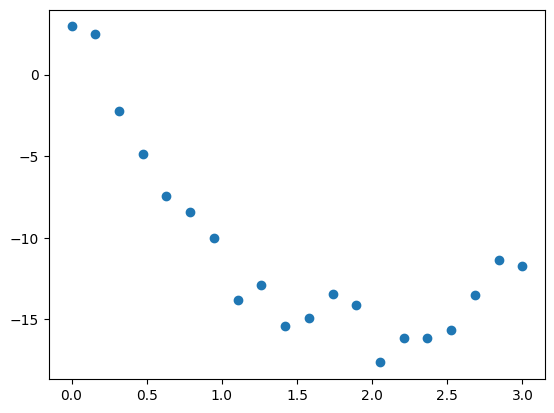

In [3]:
plt.scatter(x_data,y_data)
plt.show()

In [5]:
def model_f(x, a: int, b: int, c: int) -> None:
    return a*(x-b)**2 + c

In [ ]:
# p0 is the initial guess
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[3,2,-16])

Two things are returned here:
1. popt, which gives the optimal parameters for the `model_f` given the data

In [7]:
popt

array([  4.92207991,   2.00492121, -16.04690265])

2. `pcov`: the covariance matrix, which gives an estimate of the "error" of the parameters (based on how sensitive the "goodness-of-fit" is to changing them) and the relation the parameters have to eachother (are two seperate parameters really needed?)

In [8]:
pcov

array([[ 0.12827822, -0.01315915, -0.07363194],
       [-0.01315915,  0.00222114,  0.00322289],
       [-0.07363194,  0.00322289,  0.13377697]])

Lets plot the function with the optimal parameters next to the data

In [10]:
# extract the optimal params
a_opt, b_opt, c_opt = popt
# create an array with 100 points based on the minimum and maximum x data
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

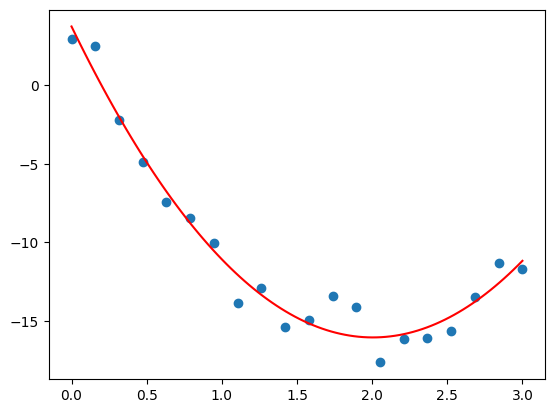

In [11]:
plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
plt.show()

`pcov` is difficult to interpret, but we can do so as follows.

Lets look at an example below

In [ ]:
# with this fit function - we introduce a new param d which is a term that is very small - so there is a lot of error on d.
def fit_f(x, a, b, c, d):
    return a*(x-b)**2 + c + d*0.0001*np.cos(x)

In [13]:
popt, pcov = curve_fit(fit_f, x_data, y_data, p0=[1,2,-16,1])

Lets look at a color plot of the `pcov` matrix:

In [14]:
pcov

array([[ 1.45024188e-01, -4.03732747e-02,  4.08923196e-02,
         3.05315127e+03],
       [-4.03732747e-02,  7.20537167e-02, -3.07488359e-01,
        -8.46750982e+03],
       [ 4.08923196e-02, -3.07488359e-01,  1.52776215e+00,
         3.78842329e+04],
       [ 3.05315127e+03, -8.46750982e+03,  3.78842329e+04,
         1.03326894e+09]])

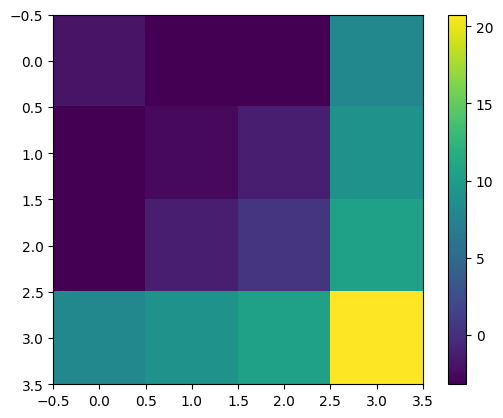

In [ ]:
# the main diagonal represents the erros on the param. taking the log on the diagonal, ypu can the error on d is really big. You can get rid of it because changing that param does not have a lot of effect on the model
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

## Examples
**Example 1: Fitting Gaussian Curves**

open some data

In [18]:
df = pd.read_csv('./data/curvefite1.csv')
x_stuff = df.Channel
y_stuff = df.Cs137

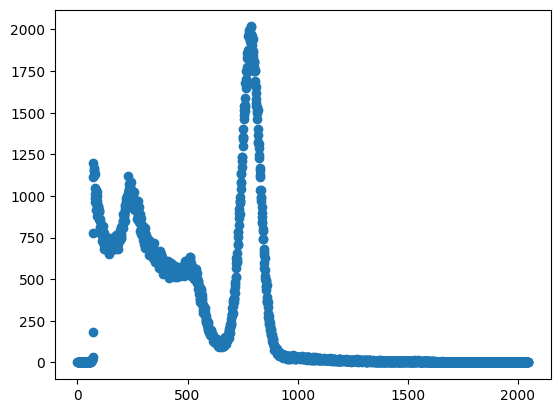

In [20]:
plt.scatter(x_stuff, y_stuff);